In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False # 그래프 한글 출력
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#pv4 데이터 살펴보기
pv4 = pd.read_csv("data/pv4.csv")
print(pv4.dtypes)
print(pv4)

#pv3 데이터 살펴보기
pv3 = pd.read_csv("data/pv3.csv")
print(pv3.dtypes)
print(pv3)

일시        object
전압        object
전류        object
출력        object
전압(RS)    object
전압(ST)    object
전압(TR)    object
전류(R)     object
전류(S)     object
전류(T)     object
출력.1      object
누적발전량     object
주파수       object
역률        object
경사        object
수평        object
모듈(℃)     object
외기(℃)     object
dtype: object
                  일시      전압      전류    출력    전압(RS)    전압(ST)    전압(TR)  \
0      1/1/2022 7:15     430     2.9   1.3    389.03    391.13    389.61   
1      1/1/2022 7:20   228.5     3.1  0.73     388.5     390.6    388.97   
2      1/1/2022 7:30   299.5     3.3     1    388.93    390.76    389.06   
3      1/1/2022 7:35     542     3.4  1.85    388.58    391.22    389.12   
4      1/1/2022 7:40     595     3.4  2.08    388.93    391.23    389.53   
...              ...     ...     ...   ...       ...       ...       ...   
39108            SUM   89384  1491.7   894  59558.88  59545.69  59534.41   
39109            AVG  580.42    9.69  5.81    386.75    386.66    386.59

In [3]:
#데이터 로드
pv4 = pd.read_csv("data/pv4.csv")
pv3 = pd.read_csv("data/newpv3.csv")

# 데이터 합치기
pv = pd.concat([pv3,pv4])

#데이터 타입
print(pv.dtypes)
print(pv.shape)

일시        object
전압        object
전류        object
출력        object
전압(RS)    object
전압(ST)    object
전압(TR)    object
전류(R)     object
전류(S)     object
전류(T)     object
출력.1      object
누적발전량     object
주파수       object
역률        object
경사        object
수평        object
모듈(℃)     object
외기(℃)     object
dtype: object
(77568, 18)


In [4]:
# 필요없는 값 제거 1
depv = pv[(pv['일시'] == 'SUM')|(pv['일시'] == 'AVG')|(pv['일시'] == 'MAX')|(pv['일시'] == 'MIN')|(pv['일시'] == ' ')].index
pv = pv.drop(depv)

# 필요없는 값 제거 2
delt = pv[(pv['일시'].str.contains('일',na = False))|(pv['일시'].str.contains('날',na = False))|(pv['일시'].str.contains('발',na = False))].index
pv = pv.drop(delt)

#nan값 제거
pv = pv.dropna()

#일시 object 타입을 날짜 타입으로 변환
pv['일시'] = pd.to_datetime(pv['일시'])
#
# #일시를 제외한 나머지 형태를 object에서 float로 변경
pv.set_index('일시',inplace=True)
pv = pv.astype(float)
pv.reset_index(inplace=True)

print(pv)
print(pv.dtypes)


                       일시     전압   전류    출력  전압(RS)  전압(ST)  전압(TR)  전류(R)  \
0     2021-05-01 05:30:00  430.0  2.1  0.98  387.62  389.52  387.73    5.3   
1     2021-05-01 05:35:00  416.5  2.1  0.92  387.58  389.12  387.38    5.3   
2     2021-05-01 05:40:00  297.0  2.2  0.68  387.68  388.78  386.88    5.1   
3     2021-05-01 05:45:00  362.0  2.2  0.83  387.52  388.82  387.08    5.2   
4     2021-05-01 05:55:00  236.5  2.4  0.59  386.72  388.52  386.72    5.1   
...                   ...    ...  ...   ...     ...     ...     ...    ...   
70527 2022-08-31 18:40:00  552.0  3.2  1.82  387.12  386.52  386.62    1.6   
70528 2022-08-31 18:45:00  574.5  3.1  1.78  388.18  387.32  387.28    1.4   
70529 2022-08-31 18:50:00  559.0  3.1  1.77  388.28  387.58  387.62    1.4   
70530 2022-08-31 18:55:00  575.5  3.0  1.79  387.82  387.02  387.18    1.5   
70531 2022-08-31 19:00:00  554.5  2.9  1.66  387.86  386.76  386.92    1.6   

       전류(S)  전류(T)  출력.1      누적발전량   주파수    역률     경사     수평 

          전압    전류    출력  전압(RS)  전압(ST)  전압(TR)  전류(R)  전류(S)  전류(T)  출력.1  \
전압      1.00  0.02  0.10    0.03    0.05    0.04   0.04   0.05   0.06  0.05   
전류      0.02  1.00  0.99    0.38    0.61    0.56   0.84   0.96   0.96  0.98   
출력      0.10  0.99  1.00    0.38    0.61    0.56   0.85   0.96   0.96  0.99   
전압(RS)  0.03  0.38  0.38    1.00    0.90    0.93   0.48   0.26   0.26  0.33   
전압(ST)  0.05  0.61  0.61    0.90    1.00    0.98   0.53   0.57   0.57  0.60   
전압(TR)  0.04  0.56  0.56    0.93    0.98    1.00   0.50   0.52   0.52  0.55   
전류(R)   0.04  0.84  0.85    0.48    0.53    0.50   1.00   0.69   0.69  0.79   
전류(S)   0.05  0.96  0.96    0.26    0.57    0.52   0.69   1.00   1.00  0.99   
전류(T)   0.06  0.96  0.96    0.26    0.57    0.52   0.69   1.00   1.00  0.99   
출력.1    0.05  0.98  0.99    0.33    0.60    0.55   0.79   0.99   0.99  1.00   
누적발전량  -0.01 -0.03 -0.03   -0.21   -0.14   -0.09  -0.26   0.10   0.10  0.03   
주파수     0.01  0.01  0.01    0.02    0.02    0.02   0

C:\Users\MyPC\AppData\Local\Temp\ipykernel_8508\1276441891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pv_cor = pv.corr()


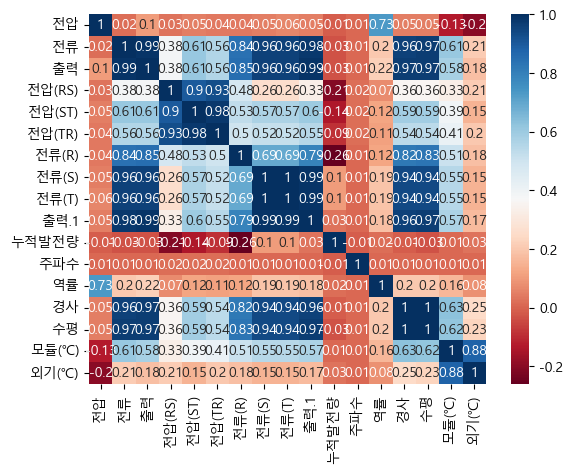

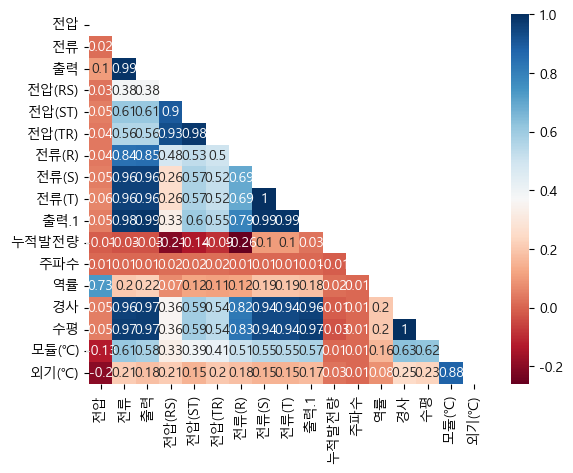

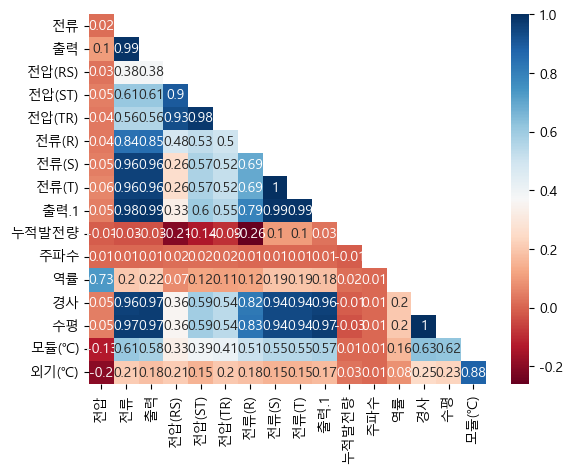

In [5]:
pv_cor = pv.corr()
pv_cor = round(pv_cor,2)
print(pv_cor)
sns.heatmap(pv_cor, annot = True, cmap= 'RdBu')
plt.show()

mask = np.zeros_like(pv_cor)
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(pv_cor, annot = True, cmap= 'RdBu',mask = mask)
plt.show()


mask_new = mask[1:, :-1]
pv_new = pv_cor.iloc[1:, :-1]
sns.heatmap(pv_new, annot = True, cmap= 'RdBu',mask = mask_new)
plt.show()


In [6]:
# 달 추출
pv['month'] = pv['일시'].dt.month
pv['year'] = pv['일시'].dt.year
pv['day'] = pv['일시'].dt.day
print(pv)
pvs = pv.groupby(['year','month','day'],as_index=False).agg(누적발전량 = ('누적발전량','min')) # 일간발전량
#print(pvs)

                       일시     전압   전류    출력  전압(RS)  전압(ST)  전압(TR)  전류(R)  \
0     2021-05-01 05:30:00  430.0  2.1  0.98  387.62  389.52  387.73    5.3   
1     2021-05-01 05:35:00  416.5  2.1  0.92  387.58  389.12  387.38    5.3   
2     2021-05-01 05:40:00  297.0  2.2  0.68  387.68  388.78  386.88    5.1   
3     2021-05-01 05:45:00  362.0  2.2  0.83  387.52  388.82  387.08    5.2   
4     2021-05-01 05:55:00  236.5  2.4  0.59  386.72  388.52  386.72    5.1   
...                   ...    ...  ...   ...     ...     ...     ...    ...   
70527 2022-08-31 18:40:00  552.0  3.2  1.82  387.12  386.52  386.62    1.6   
70528 2022-08-31 18:45:00  574.5  3.1  1.78  388.18  387.32  387.28    1.4   
70529 2022-08-31 18:50:00  559.0  3.1  1.77  388.28  387.58  387.62    1.4   
70530 2022-08-31 18:55:00  575.5  3.0  1.79  387.82  387.02  387.18    1.5   
70531 2022-08-31 19:00:00  554.5  2.9  1.66  387.86  386.76  386.92    1.6   

       전류(S)  전류(T)  ...      누적발전량   주파수    역률     경사     수평  

In [7]:
# 일간발전량 구하기
# 일간발전량 = 다음날 최소 발전량 - 당일 최소 발전량
def days(init):
    cnt = 0
    temp = 0
    init['일간발전량'] = 0
    for ct in range(0,len(init)):
        if ct != len(init)-1:
            cnt = init['누적발전량'][ct] # 당일 최소 발전량
            temp = init['누적발전량'][ct+1] - cnt # 다음날 최소 발전량 - 당일 최소 발전량
            init['일간발전량'][ct] = temp
        else:
            init['일간발전량'][ct] = 0

days(pvs) # 일간발전량을 구하는 함수

In [8]:
# 일간발전량이 0 미만인것을 인덱스 형태로 추출
pv0 = pvs.query('(일간발전량 < 0)| ((year == 2022) and (day == 31) and (month == 8))').index 
pvs = pvs.drop(pv0)  # 제거
print(pvs)

     year  month  day      누적발전량   일간발전량
0    2021      5    1  162585.09   76.21
1    2021      5    2  162661.30  303.70
2    2021      5    3  162965.00  323.09
3    2021      5    4  163288.09  165.91
4    2021      5    5  163454.00  311.00
..    ...    ...  ...        ...     ...
482  2022      8   26  266715.00  318.09
483  2022      8   27  267033.09  279.10
484  2022      8   28  267312.19  333.00
485  2022      8   29  267645.19  100.00
486  2022      8   30  267745.19   59.81

[486 rows x 5 columns]


     year  month  day      누적발전량   일간발전량
0    2021      5    1  162585.09   76.21
1    2021      5    2  162661.30  303.70
2    2021      5    3  162965.00  323.09
3    2021      5    4  163288.09  165.91
4    2021      5    5  163454.00  311.00
..    ...    ...  ...        ...     ...
482  2022      8   26  266715.00  318.09
483  2022      8   27  267033.09  279.10
484  2022      8   28  267312.19  333.00
485  2022      8   29  267645.19  100.00
486  2022      8   30  267745.19   59.81

[486 rows x 5 columns]


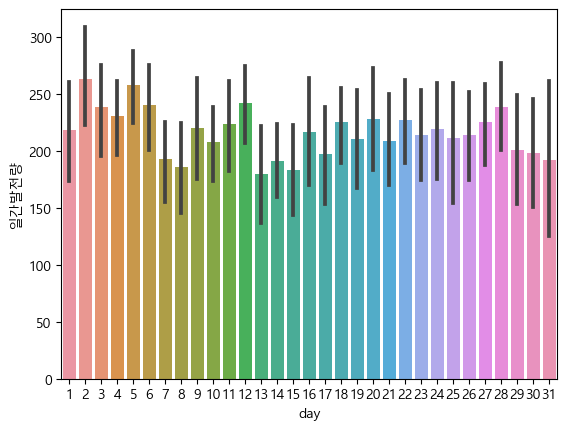

    year  month    월간발전량
0   2021      5  6766.21
1   2021      6  6533.09
2   2021      7  8508.91
3   2021      8  5499.09
4   2021      9  6166.11
5   2021     10  5561.80
6   2021     11  5627.09
7   2021     12  5081.21
8   2022      1  5739.70
9   2022      2  6771.20
10  2022      3  6769.80
11  2022      4  7760.00
12  2022      5  8731.00
13  2022      6  7157.00
14  2022      7  6844.00
15  2022      8  5704.00


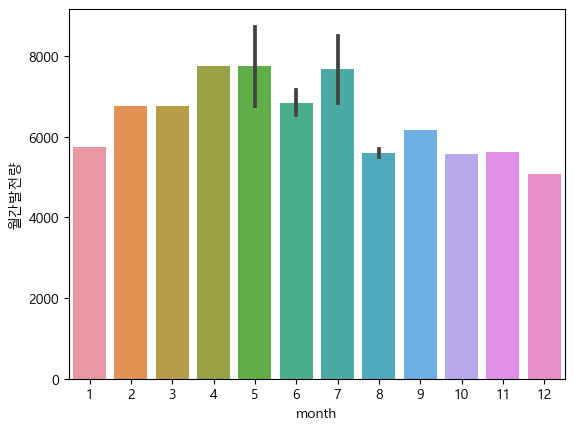

In [9]:
#일간발전량 그래프
print(pvs)
sns.barplot(data=pvs, x = 'day', y = '일간발전량')
plt.show()

#월간발전량
pvm = pvs.groupby(['year', 'month'], as_index=False).agg(월간발전량=('일간발전량', 'sum'))
print(pvm)
sns.barplot(data=pvm, x = 'month', y = '월간발전량')
plt.show()

In [10]:
# 2021 데이터 분리
pvs3 = pvs.groupby(['year'],as_index=False).get_group(2021)

# 2022 데이터 분리
pvs4 = pvs.groupby(['year'], as_index = False).get_group(2022)

print(pvs3)
print(pvs4)

pvs3s = pvs3.groupby(['year','month'],as_index = False).agg(월간발전량 = ('일간발전량','sum'))
pvs4s = pvs4.groupby(['year','month'],as_index = False).agg(월간발전량 = ('일간발전량','sum'))
print(pvs3s)
print(pvs4s)



     year  month  day      누적발전량   일간발전량
0    2021      5    1  162585.09   76.21
1    2021      5    2  162661.30  303.70
2    2021      5    3  162965.00  323.09
3    2021      5    4  163288.09  165.91
4    2021      5    5  163454.00  311.00
..    ...    ...  ...        ...     ...
240  2021     12   27  211473.00  133.00
241  2021     12   28  211606.00  181.00
242  2021     12   29  211787.00  118.00
243  2021     12   30  211905.00  207.00
244  2021     12   31  212112.00  216.30

[244 rows x 5 columns]
     year  month  day      누적발전량   일간발전량
245  2022      1    1  212328.30  209.90
246  2022      1    2  212538.20  170.80
247  2022      1    3  212709.00  199.00
248  2022      1    4  212908.00  211.00
249  2022      1    5  213119.00  149.00
..    ...    ...  ...        ...     ...
482  2022      8   26  266715.00  318.09
483  2022      8   27  267033.09  279.10
484  2022      8   28  267312.19  333.00
485  2022      8   29  267645.19  100.00
486  2022      8   30  267745.19 

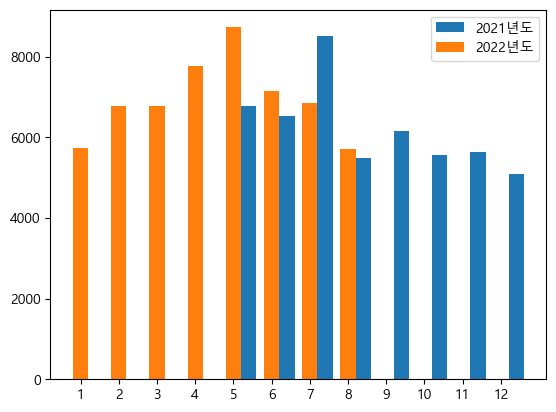

   year  month      월간표준편차
0  2021      5  100.019056
1  2021      6   98.283935
2  2021      7   68.565567
3  2021      8   75.768544
4  2021      9   77.131584
5  2021     10   84.843915
6  2021     11   53.250437
7  2021     12   55.444712
   year  month     월간표준편차
0  2022      1  55.576133
1  2022      2  54.357907
2  2022      3  98.472284
3  2022      4  74.364461
4  2022      5  81.841630
5  2022      6  88.312230
6  2022      7  71.229860
7  2022      8  95.486522


In [11]:
# 그래프 그리기
wid = 0.4
plt.bar(pvs3s['month']+0.4, pvs3s['월간발전량'],width=wid , label= '2021년도')
plt.bar(pvs4s['month'], pvs4s['월간발전량'],width=wid, label = "2022년도")
mons = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(mons) # 월별로 출력하기 위해 x 축 이름을 바꿔줌
plt.legend()     # 범례표시
plt.show()

# 표준편차
pvs3sp = pvs3.groupby(['year','month'],as_index = False).agg(월간표준편차 = ('일간발전량','std'))
pvs4sp = pvs4.groupby(['year','month'],as_index = False).agg(월간표준편차 = ('일간발전량','std'))
print(pvs3sp)
print(pvs4sp)

   year  month    월간발전량   월간평균모듈온도
0  2021      5  6766.21  24.069676
1  2021      6  6532.79  27.770609
2  2021      7  8508.91  34.355455
3  2021      8  5499.09  29.968316
4  2021      9  6166.11  28.356866
5  2021     10  5561.80  22.985089
6  2021     11  5627.09  18.172404
7  2021     12  5081.21  10.228445
   year  month   월간발전량   월간평균모듈온도
0  2022      1  5739.7   9.246061
1  2022      2  6771.2  10.585885
2  2022      3  6769.8  15.193475
3  2022      4  7760.0  22.688244
4  2022      5  8731.0  26.965971
5  2022      6  7157.0  28.200985
6  2022      7  6844.0  31.686642
7  2022      8  5704.0  31.236928
   year  month    월간발전량   월간평균모듈온도
0  2021      5  67.6621  24.069676
1  2021      6  65.3279  27.770609
2  2021      7  85.0891  34.355455
3  2021      8  54.9909  29.968316
4  2021      9  61.6611  28.356866
5  2021     10  55.6180  22.985089
6  2021     11  56.2709  18.172404
7  2021     12  50.8121  10.228445
   year  month   월간발전량   월간평균모듈온도
0  2022      1  57.397   9.246

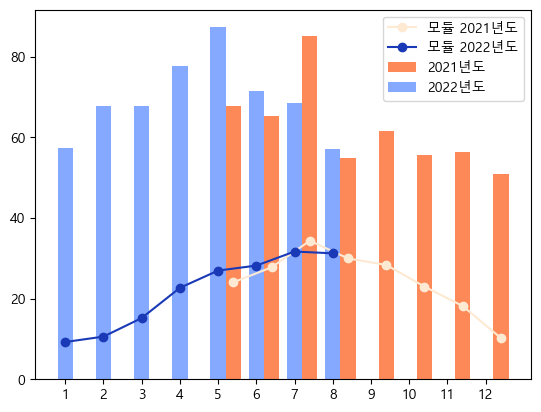

In [12]:
#모듈온도와 발전량의 관계

pvmd = pv.groupby(['year','month','day'],as_index=False).agg(모듈온도 =('모듈(℃)','mean'),누적발전량 = ('누적발전량','min'),외기온도 = ('외기(℃)','mean'))
days(pvmd) # 일간발전량 구하는 함수

#데이터 나누기
pvmd3 = pvmd.groupby(['year'],as_index=False).get_group(2021)
pvmd4 = pvmd.groupby(['year'], as_index = False).get_group(2022)

pvmd3m = pvmd3.groupby(['year','month'],as_index = False).agg(월간발전량 = ('일간발전량','sum'),월간평균모듈온도 =('모듈온도','mean'))
pvmd4m = pvmd4.groupby(['year','month'],as_index = False).agg(월간발전량 = ('일간발전량','sum'),월간평균모듈온도 =('모듈온도','mean'))
print(pvmd3m)
print(pvmd4m)

#데이터 값이 너무 크므로 100으로 나눠줌
pvmd3m['월간발전량'] = pvmd3m['월간발전량']/100
pvmd4m['월간발전량'] = pvmd4m['월간발전량']/100
print(pvmd3m)
print(pvmd4m)


wid = 0.4
plt.bar(pvmd3m['month']+0.4, pvmd3m['월간발전량'],width=wid , label= '2021년도',color = '#FD8959')
plt.bar(pvmd4m['month'], pvmd4m['월간발전량'],width=wid, label = "2022년도",color = '#84A9FF')
plt.plot(pvmd3m['month']+0.4, pvmd3m['월간평균모듈온도'],label = "모듈 2021년도",color = '#FEE9D2',marker='o')
plt.plot(pvmd4m['month'], pvmd4m['월간평균모듈온도'],label = "모듈 2022년도",color = '#1939B7',marker='o')
plt.xticks(mons) # 월별로 출력하기 위해 x 축 이름을 바꿔줌
plt.legend()     # 범례표시
plt.show()

   year  month    월간발전량   월간평균외기온도
0  2021      5  6766.21  19.252183
1  2021      6  6532.79  23.127359
2  2021      7  8508.91  28.631689
3  2021      8  5499.09  26.370211
4  2021      9  6166.11  23.696603
5  2021     10  5561.80  18.781487
6  2021     11  5627.09  13.543010
7  2021     12  5081.21   6.495069
   year  month   월간발전량   월간평균외기온도
0  2022      1  5739.7   4.297715
1  2022      2  6771.2   4.295309
2  2022      3  6769.8  10.553922
3  2022      4  7760.0  17.277775
4  2022      5  8731.0  21.424335
5  2022      6  7157.0  23.893365
6  2022      7  6844.0  27.210437
7  2022      8  5704.0  27.457959
   year  month    월간발전량   월간평균외기온도
0  2021      5  67.6621  19.252183
1  2021      6  65.3279  23.127359
2  2021      7  85.0891  28.631689
3  2021      8  54.9909  26.370211
4  2021      9  61.6611  23.696603
5  2021     10  55.6180  18.781487
6  2021     11  56.2709  13.543010
7  2021     12  50.8121   6.495069
   year  month   월간발전량   월간평균외기온도
0  2022      1  57.397   4.297

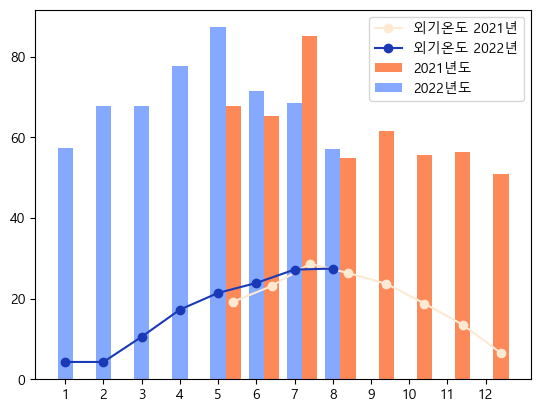

In [13]:
#외기온도와의 관계
pvmd3t = pvmd3.groupby(['year','month'],as_index = False).agg(월간발전량=('일간발전량','sum'),월간평균외기온도=('외기온도','mean'))
pvmd4t = pvmd4.groupby(['year','month'],as_index = False).agg(월간발전량=('일간발전량','sum'),월간평균외기온도=('외기온도','mean'))
print(pvmd3t)
print(pvmd4t)

#데이터 값이 너무 크므로 100으로 나눠줌
pvmd3t['월간발전량'] = pvmd3t['월간발전량']/100
pvmd4t['월간발전량'] = pvmd4t['월간발전량']/100
print(pvmd3t)
print(pvmd4t)

plt.bar(pvmd3t['month']+0.4, pvmd3t['월간발전량'] ,width=wid , label= '2021년도',color = '#FD8959')
plt.bar(pvmd4t['month'], pvmd4t['월간발전량'],width=wid, label = "2022년도",color = '#84A9FF')
plt.plot(pvmd3t['month']+0.4, pvmd3t['월간평균외기온도'],label = "외기온도 2021년",color = '#FEE9D2',marker='o')
plt.plot(pvmd4t['month'], pvmd4t['월간평균외기온도'],label = "외기온도 2022년",color = '#1939B7',marker='o')
plt.xticks(mons) # 월별로 출력하기 위해 x 축 이름을 바꿔줌
plt.legend()     # 범례표시
plt.show()

파이썬 3.11에서는 Prophet을 실행 불가능 하므로 콜웹으로 옮겨서 구동하기위해 파일을 따로 추출

In [14]:
pvs['일시'] = pvs['year'].astype(str)+ '-'+pvs['month'].astype(str)+'-'+pvs['day'].astype(str)
pvs['일시'] = pd.to_datetime(pvs['일시']) # 데이트타임으로 변환
print(pvs)
# pvs.to_csv('data/pvdt.csv',encoding='utf-8',index=False) # csv 파일 추출

     year  month  day      누적발전량   일간발전량         일시
0    2021      5    1  162585.09   76.21 2021-05-01
1    2021      5    2  162661.30  303.70 2021-05-02
2    2021      5    3  162965.00  323.09 2021-05-03
3    2021      5    4  163288.09  165.91 2021-05-04
4    2021      5    5  163454.00  311.00 2021-05-05
..    ...    ...  ...        ...     ...        ...
482  2022      8   26  266715.00  318.09 2022-08-26
483  2022      8   27  267033.09  279.10 2022-08-27
484  2022      8   28  267312.19  333.00 2022-08-28
485  2022      8   29  267645.19  100.00 2022-08-29
486  2022      8   30  267745.19   59.81 2022-08-30

[486 rows x 6 columns]


=====================================================================================================================================================================
https://hyperconnect.github.io/2020/03/09/prophet-package.html